# Simple Restricted Boltzmann Machine (RBM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.typing import NDArray

class RBM:
    def __init__(self, num_visible: int, num_hidden: int):
        self.num_visible = num_visible
        self.num_hidden = num_hidden
        # Initialize weights and biases
        self.weights = np.random.normal(0, 0.01, (num_visible, num_hidden))
        self.visible_bias = np.zeros(num_visible)
        self.hidden_bias = np.zeros(num_hidden)

    def sigmoid(self, x: NDArray[np.float64]):
        return 1 / (1 + np.exp(-x))

    def sample_prob(self, probs: NDArray[np.float64]):
        return (np.random.rand(*probs.shape) < probs).astype(np.float32)

    def train(self, data: NDArray[np.float32], epochs: int =1000, lr: float=0.1):
        for _ in range(epochs):
            for x in data:
                # Positive phase
                v0 = x
                h0_prob = self.sigmoid(np.dot(v0, self.weights) + self.hidden_bias)
                h0 = self.sample_prob(h0_prob)

                # Negative phase
                v1_prob = self.sigmoid(np.dot(h0, self.weights.T) + self.visible_bias)
                v1 = self.sample_prob(v1_prob)
                h1_prob = self.sigmoid(np.dot(v1, self.weights) + self.hidden_bias)

                # Weight updates
                self.weights += lr * (np.outer(v0, h0_prob) - np.outer(v1, h1_prob))
                self.visible_bias += lr * (v0 - v1)
                self.hidden_bias += lr * (h0_prob - h1_prob)

    def reconstruct(self, v: NDArray[np.float32], steps: int=1):
        for _ in range(steps):
            h_prob = self.sigmoid(np.dot(v, self.weights) + self.hidden_bias)
            h = self.sample_prob(h_prob)
            v_prob = self.sigmoid(np.dot(h, self.weights.T) + self.visible_bias)
            v = self.sample_prob(v_prob)
        return v

<Figure size 1000x300 with 0 Axes>

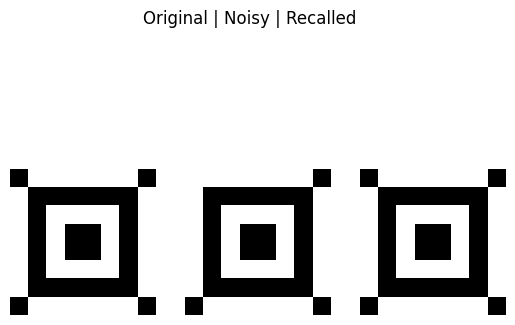

<Figure size 1000x300 with 0 Axes>

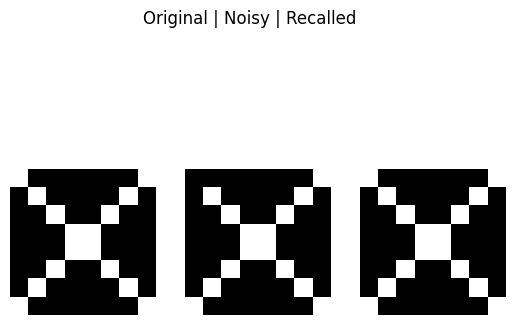

In [2]:
def plot_patterns(patterns: list[NDArray[np.float32]], title: str):
    _, axes = plt.subplots(1, len(patterns))
    for ax, pattern in zip(axes, patterns):
        ax.imshow(pattern.reshape(8, 8), cmap='gray')
        ax.axis('off')
    plt.suptitle(title)
    plt.show()


# Define two 8x8 binary patterns (digit-like)
pattern_1 = np.array([
    [0,1,1,1,1,1,1,0],
    [1,0,0,0,0,0,0,1],
    [1,0,1,1,1,1,0,1],
    [1,0,1,0,0,1,0,1],
    [1,0,1,0,0,1,0,1],
    [1,0,1,1,1,1,0,1],
    [1,0,0,0,0,0,0,1],
    [0,1,1,1,1,1,1,0]
])

pattern_2 = np.array([
    [1,0,0,0,0,0,0,1],
    [0,1,0,0,0,0,1,0],
    [0,0,1,0,0,1,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,0,1,1,0,0,0],
    [0,0,1,0,0,1,0,0],
    [0,1,0,0,0,0,1,0],
    [1,0,0,0,0,0,0,1]
])

data = np.array([pattern_1.flatten(), pattern_2.flatten()]).astype(np.float32)

# Train RBM
rbm = RBM(num_visible=64, num_hidden=32)
rbm.train(data, epochs=1000, lr=0.1)

def test(flat_pattern: NDArray[np.float32]):
    # Test recall with noisy input
    noisy = np.copy(flat_pattern)
    noisy[0] = not noisy[0]

    reconstructed = rbm.reconstruct(noisy, steps=1)

    # Visualize
    plt.figure(figsize=(10, 3))
    plot_patterns([flat_pattern, noisy, reconstructed], "Original | Noisy | Recalled")

test(data[0])
test(data[1])